# SURE TRUST: Assignment 5 

##  Binary Classfication

#### Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors. 

#### Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

    Age of the patient
    Gender of the patient
    Total Bilirubin
    Direct Bilirubin
    Alkaline Phosphotase
    Alamine Aminotransferase
    Aspartate Aminotransferase
    Total Protiens
    Albumin
    Albumin and Globulin Ratio
    Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

##### Imagine yourself as ML Engineer and you want to build a model which can predict disease properly. You need to try multiple algorithms to find which one performs better with good accuracy


### Preprocessing

    Use dummy variables
    Standardize if needed
    Split data into different sets(MUST)


### Classification models you need to implement

    Logistic Regression
    Naive Bayes
    Decision Tree
        Plot Tree
    Random Forest
    SVC Support Vector Machines

###### Each different model will fetch 20 marks with all preprocessing, validation steps
    
### Validation
    Accuracy score
    f1 score
    
### Extra and Optional
    EDA
    Visualizations


In [4]:
import pandas as pd
import requests

url= "https://raw.githubusercontent.com/jagadeesh-gajula/ImportingData/master/liver_patients_data.csv"
text = requests.get(url).text
file = open('data.csv','w')
file.write(text)
file.close()

data = pd.read_csv('data.csv')

In [5]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
data=data.fillna(0)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#### Use dummy variables

In [9]:
rn=pd.get_dummies(data['Gender'],drop_first=True)
data_rn=pd.concat([rn,data],axis=1)
data_rn=data_rn.drop('Gender',axis=1)

In [10]:
data_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Male                        583 non-null    uint8  
 1   Age                         583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


In [15]:
x= data_rn.drop('Dataset',axis=1)

In [16]:
y=data_rn.Dataset

#### Split data into different sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log = LogisticRegression()

In [21]:
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
prediction =log.predict(x_test)

In [26]:
from sklearn.metrics import f1_score

In [27]:
f1_score(y_test,prediction)

0.8617886178861789

#### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb = GaussianNB()

In [35]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
prediction = nb.predict(x_test)

In [32]:
f1_score(y_test,prediction)

0.5

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=15)  #n_estimators is model secting manually

In [39]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
prediction = rfc.predict(x_test)

In [41]:
f1_score(y_test,prediction)

0.7853881278538812

#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree= DecisionTreeClassifier(max_depth=10)

In [44]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
prediction=dtree.predict(x_test)

In [46]:
f1_score(y_test,prediction)

0.8

Plot Tree

In [47]:
from sklearn import tree

[Text(224.18659539473686, 207.55636363636364, 'X[2] <= 1.65\ngini = 0.416\nsamples = 437\nvalue = [308, 129]'),
 Text(169.74029605263158, 187.7890909090909, 'X[5] <= 36.5\ngini = 0.483\nsamples = 270\nvalue = [160, 110]'),
 Text(130.23059210526316, 168.0218181818182, 'X[1] <= 71.0\ngini = 0.5\nsamples = 184\nvalue = [94, 90]'),
 Text(110.68223684210527, 148.25454545454545, 'X[6] <= 57.5\ngini = 0.5\nsamples = 175\nvalue = [86, 89]'),
 Text(84.80131578947369, 128.48727272727274, 'X[7] <= 6.45\ngini = 0.499\nsamples = 165\nvalue = [78, 87]'),
 Text(46.25526315789474, 108.72, 'X[4] <= 113.0\ngini = 0.471\nsamples = 71\nvalue = [27, 44]'),
 Text(41.85, 88.95272727272729, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(50.660526315789475, 88.95272727272729, 'X[8] <= 3.15\ngini = 0.457\nsamples = 68\nvalue = [24, 44]'),
 Text(35.242105263157896, 69.18545454545455, 'X[9] <= 0.955\ngini = 0.484\nsamples = 56\nvalue = [23, 33]'),
 Text(17.621052631578948, 49.418181818181836, 'X[4] <= 191.0\ng

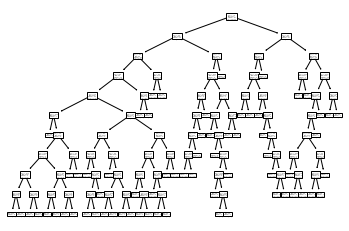

In [48]:
tree.plot_tree(dtree)

#### SVC Support Vector Machines

In [52]:
from sklearn.svm import SVC

In [53]:
sm = SVC(kernel='rbf') 

In [54]:
sm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
prediction=sm.predict(x_test)

In [ ]:
f1_score(y_test,prediction)

0.8225806451612903

f1_score of

Logistic Regression         0.861788
Naive Bayes                 0.5
Random Forest               0.785388
Decision Tree               0.8
SVC Support Vector Machines 0.822580

Logistic Regression is best for this classification followed by SVM 
